<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


#### For your convenience, we have already written code to import the data below.


In [8]:

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)


In [9]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [10]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


<details><summary>Click here for a hint</summary>

<p>
You will require:-
<br>to group the year and calculate the average on the 'Automobile Sales', as the data has years and months column
<br>make use of .plot() with kind = 'line'
<br>donot forget to include labels and title
</details>


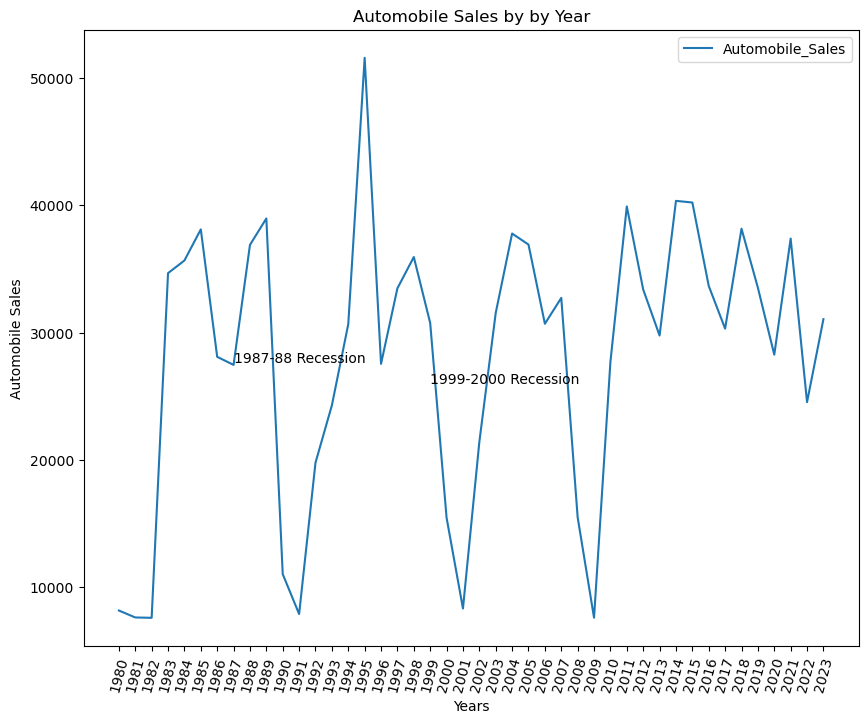

In [53]:

df_line =df.groupby(df['Year'])['Automobile_Sales'].mean()

df_by_year.plot(kind = 'line', x= 'Year', y = 'Automobile_Sales', figsize = (10, 8))
plt.xlabel('Years')
plt.ylabel('Automobile Sales')


plt.title("Automobile Sales by by Year")

# Show the plot
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1987, 27650, '1987-88 Recession')
plt.text(1999, 26000, '1999-2000 Recession')
plt.show()

<details><summary>Click here for a solution template</summary>

```python
    #create data for plotting
    df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
    plt.figure(figsize=(10, 6))
    df_line.plot(kind = 'line')
    plt.xlabel('........')
    plt.ylabel('.........')
    plt.title('......................')
    plt.show()
```
</details>


### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession 
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br> 


<details><summary>Click here for a hint</summary>
    <p>
    You can create the list for the range 1980 till 2023 and pass that list to the plt.xticks function or you can directly pass the range to the function.
    You might need to rotate the ticks to an angle so that they fit in well on the axis
    You can include annotation with plt.text(x, y, 'text to display') 
    </p>
</details>


<details>
    <summary>Click here for Solution template</summary>

```python
    plt.figure(figsize=(10, 6))
    df_line = ...............
    df_line.plot(kind = 'line')
    plt.xticks(list(range(1980,2024)), rotation = 75)
    plt.xlabel('..............')
    plt.ylabel('............')
    plt.title('...................')
    plt.text(1982, 650, '1981-82 Recession')
    plt.text(......, ..., '..............')
    plt.legend()
    plt.show()
```

</details>


<span style="color:red">
Save this plot as "Line_Plot_1.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


<details><summary>Click here for a hint</summary>

<p>
    You will require:-
    <br>create a separate dataframe where the column recession has a value of '1'
    <br>to group the year, vehicle_type and calculate the average on the 'Automobile Sales'
    <br>one way is to -
    <br>use as_index as false else you will endup with multiple-indexed datafame
    <br>later set year as index and groupby vehicle over Sales and plot
    <br>make use of .plot() with kind = 'line'
    <br>do not forget to include labels and title
</p>
</details>


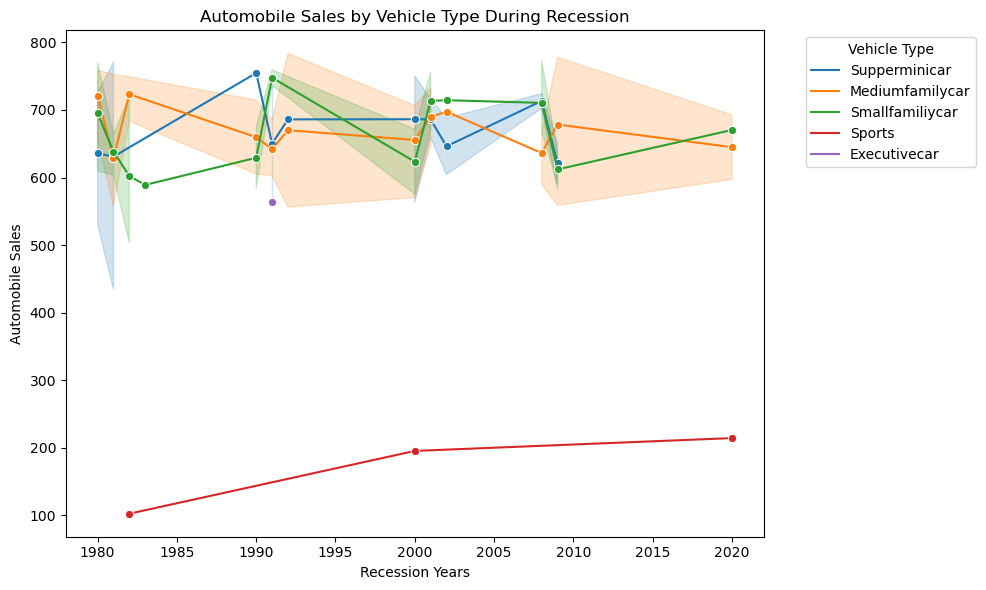

In [34]:
rec_df = df[df['Recession'] == 1]


plt.figure(figsize = (10, 6))
sns.lineplot(data = rec_df, x= 'Year', y = 'Automobile_Sales', hue = 'Vehicle_Type',marker = 'o')
plt.xlabel('Recession Years')
plt.ylabel('Automobile Sales')

plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()

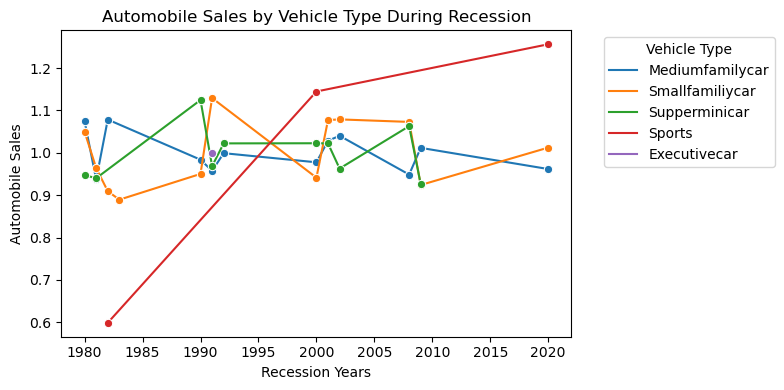

In [40]:
rec_df = df[df['Recession'] == 1]

df_year_wise = rec_df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_year_wise['Normalized_Sales'] = df_year_wise.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set the 'Year' as the index
df_year_wise.set_index('Year', inplace=True)



plt.figure(figsize = (8, 4))
sns.lineplot(data = df_year_wise, x= 'Year', y = 'Normalized_Sales', hue = 'Vehicle_Type',marker = 'o')
plt.xlabel('Recession Years')
plt.ylabel('Automobile Sales')

plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()

#### From the above plot, what insights have you gained on the sales of various vehicle types?<br> Type in your answer below:


##  i plOTTED IT TWO WAYS, in normalized way, The Purchase of sports cars increase even during the recession timmes, but when you see it even though it increase the number was still less than other cars. That means the richer one remained almost stable during recession as well.

<details>
    <summary>Inference</summary>
<p>
Inference:
 Sports cars and supermini cars demonstrate resilience or growth during recession periods.Medium family cars and, to a lesser extent, small family cars show more sensitivity to economic changes, with less consistent trends.The upward trend in sports vehicles sales indicates the stability of the luxury market, even during economic downturns.<br><br>
    </p>
    </details>


<span style="color:red">
Save this plot as "Line_Plot_2.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


<details><summary>Click here for a hint</summary>

<p>
     To visualize the average number of vehicles sold during recession and non-recession periods, you can use a bar chart
        <br> You will need to group recession average Automobile_Sales and then plot it<br>
    Make use of sns.barplot(x=x,y=y, data = df)</p>
</details>


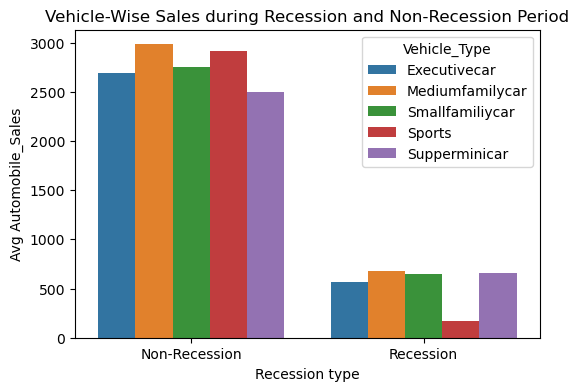

In [54]:


rec_df=df.groupby(['Recession','Vehicle_Type' ])['Automobile_Sales'].mean().reset_index()

#sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=rec_df)
plt.xlabel('Recession type')
plt.ylabel('Avg Automobile_Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])

plt.show()

<details>
    <summary>Click here for Solution template</summary>

```python
    new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

    # Create the bar chart using seaborn
    plt.figure(figsize=(.........., ............)
    sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
    plt.xlabel('............')
    plt.ylabel('...............')
    plt.title('Average Automobile Sales during Recession and Non-Recession')
    plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
    plt.show()
```

</details>


### Now you want to compare the sales of different vehicle types during a recession and a non-recession period
<br>We recommend that you use the functionality of **Seaborn Library** to create this visualization


<details><summary>Click here for a hint</summary>

<p>
     To visualize sales of different vehicles during recession and non-recession periods, you can use a bar chart
        <br> You will need to group Recession, Vehicle_Type for average Automobile_Sales and then plot it<br>
    Make use of sns.barplot(x=x,y=y, data = df)</p>
</details>


In [ ]:

rec_data = df[df['Recession'] == 1]

rec_df=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

#sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=rec_df)
plt.xlabel('Recession type')
plt.ylabel('Avg Automobile_Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])

plt.show()

<details>
<summary>Click here for Solution template</summary>

```python
   # Filter the data for recessionary periods
    recession_data = df[df['Recession'] == 1]

    dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

    # Calculate the total sales volume by vehicle type during recessions
    #sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

    # Create the grouped bar chart using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='......', y='........', hue='Vehicle_Type', data=dd)
    plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
    plt.xlabel('.............')
    plt.ylabel('..............')
    plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

    plt.show()

```
</details>


### From the above chart what insights have you gained on the overall sales of automobiles during recession? <br> Type your answer below:-


During recession there is a decrease in overall sales

<details>
<summary>Inference</summary>

From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.<br>However, the most affected type of vehicle is executivecar and sports<br><br>
</details>


<span style="color:red">
Save this plot as "Bar_Chart.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


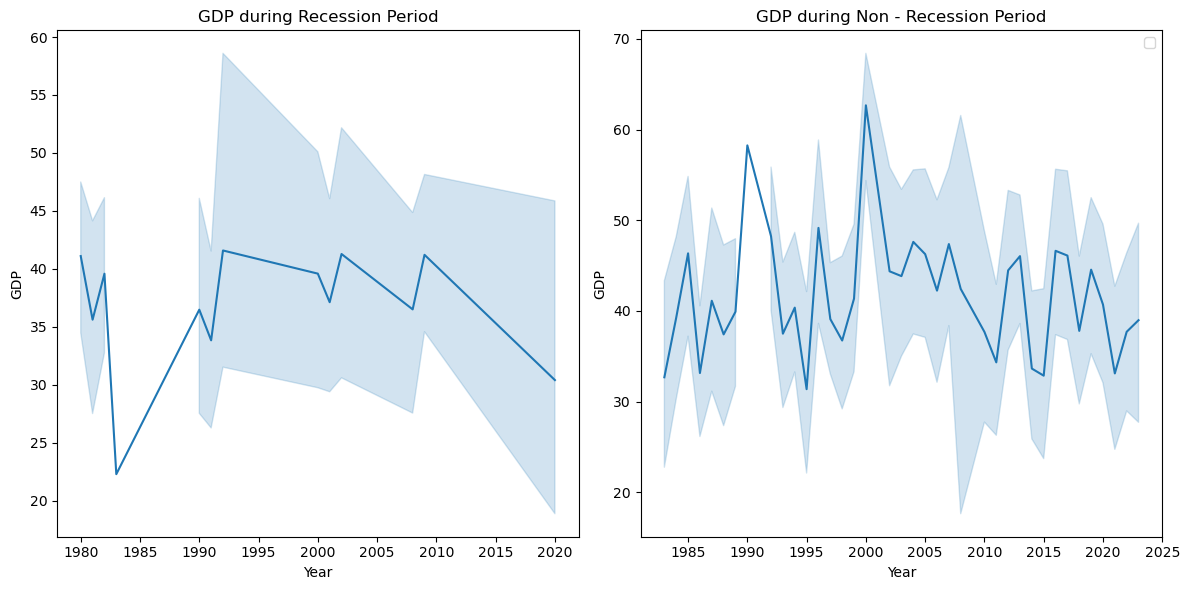

In [44]:
fig=plt.figure(figsize=(12, 6))

rec_df = df[df['Recession'] == 1]
non_rec_df = df[df['Recession'] == 0]

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

sns.lineplot(data = rec_df, x= 'Year', y = 'GDP', ax = ax_1)
plt.xlabel('Year')
plt.ylabel('GDP')
ax_1.set_title('GDP during Recession Period')


sns.lineplot(data = non_rec_df, x= 'Year', y = 'GDP', ax = ax_2)
ax_2.set_title('GDP during Non - Recession Period')
plt.legend()
plt.tight_layout()
plt.show()


<details>
<summary>Click here for Solution template</summary>

```python
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    non_rec_data = df[df['Recession'] == 0]
    
    #Figure
    fig=plt.figure(figsize=(12, 6))
    
    #Create different axes for subploting
    ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
    ax1 = fig.add_subplot(... ,... ,... ) # add subplot 2 (1 row, 2 columns, second plot). 
    
    #plt.subplot(1, 2, 1)
    sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
    ax0.set_xlabel('Year')
    ax0.set_ylabel('GDP')
    ax0.set_title('GDP Variation during Recession Period')
    
    #plt.subplot(1, 2, 2)
    sns.lineplot(x='......', y='......', data=........, label='.........',ax=...)
    ax1.set_xlabel('.....')
    ax1.set_ylabel('.......')
    ax1.set_title('..........')
    
    plt.tight_layout()
    plt.show()

   #------------------------------------------------Alternatively--------------
   #Using subplot()
    plt.figure(figsize=(............, ..........))
    
    #subplot 1
    plt.subplot(1, 2, 1)
    sns.lineplot(x='.........', y='......', data=.........., label='......')
    plt.xlabel('.......')
    plt.ylabel('..........')
    plt.legend()
    #subplot 1
    plt.subplot(1, 2, 2)
    sns.lineplot(x='.........', y='......', data=.........., label='......')
    plt.xlabel('.......')
    plt.ylabel('..........')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
```
</details>


### Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company<br><br>
<span style="color:red">
Save this plot as "Subplot.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


<details><summary>Click here for a hint</summary>

<p>
     You can create Bubble Chart by calling the scatter()
        <br>Pass the 'Month' and 'Automobile_Sales' to the functions as x and y and then use Seasonality weight for size parameter</p>
</details>


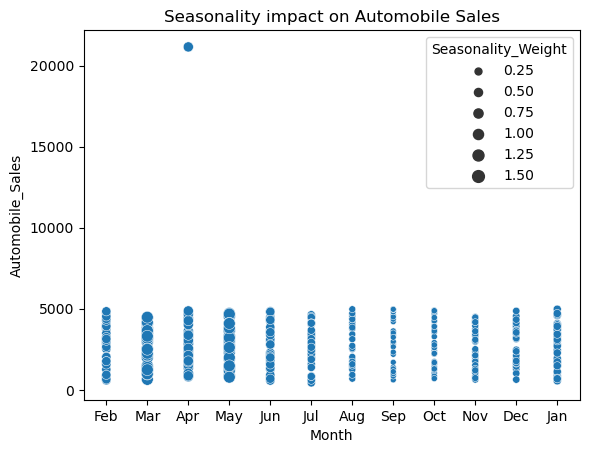

In [45]:
non_rec_data = df[df['Recession']== 0]
size=non_rec_data['Seasonality_Weight']

sns.scatterplot(data = non_rec_data, x = 'Month', y = 'Automobile_Sales', size = size)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

<details>
<summary>Click here for Solution template</summary>

```python
    non_rec_data = df[df['Recession'] == 0]
    
    size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
    sns.scatterplot(data=non_rec_data, x='........', y='........', size=size)
    
    #you can further include hue='Seasonality_Weight', legend=False)

    plt.xlabel('Month')
    plt.ylabel('Automobile_Sales')
    plt.title('Seasonality impact on Automobile Sales')

    plt.show()

```
</details>


### Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br><br>
<span style="color:red">
Save this plot as "Bubble.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


<details><summary>Click here for a hint</summary>

<p>
     You can create dataframe where recession is '1'.
        <br>Pass the 'Consumer_Confidence' and 'Automobile_Sales' to the plt.scatter()</p>
</details>


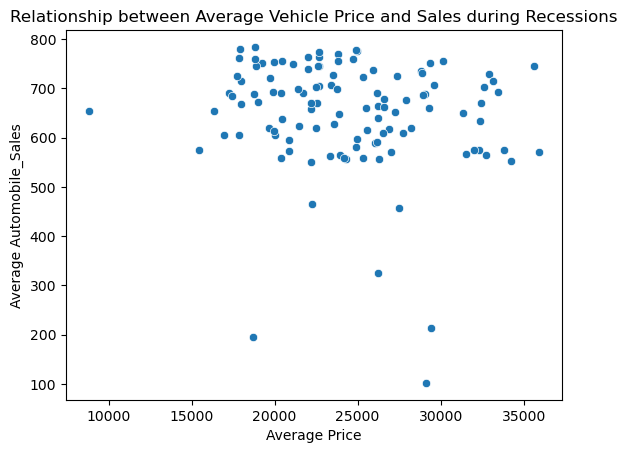

In [46]:
rec_df = df[df['Recession'] == 1]

sns.scatterplot(rec_df, x = 'Price', y = 'Automobile_Sales')

plt.xlabel('Average Price')
plt.ylabel('Average Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.show()

In [ ]:
df[[ 'Price', 'Automobile_Sales']].corr()
### That doesn't show much correlation

In [ ]:
## Between consuer confidence and sales

rec_df = df[df['Recession'] == 1]

sns.scatterplot(rec_df, x = 'Consumer_Confidence', y = 'Automobile_Sales')

plt.xlabel('Consumer Confidence')
plt.ylabel('Average Automobile_Sales')
plt.title('Consumer Confidence relate to the sales volume during recessions')

plt.show()

In [ ]:
df[[ 'Consumer_Confidence', 'Automobile_Sales']].corr()


<details>
<summary>Click here for Solution template</summary>

```python
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
    plt.xlabel('.....')
    plt.ylabel('.......')
    plt.title('..........')
    plt.show()

```
</details>



 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


### Inference
There is not much relation!<br><br>
<span style="color:red">
Save this plot as "Scatter.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


<details><summary>Click here for a hint</summary>

<p>
     You can create two dataframe for recession and nonreccession period.
    <br> Calculate the sum of Advertising_Expenditure for both dataframes
    <br> Pass these total values to plt.pie(). May include labels as ['Recession', 'Non-Recession']
        <br>Feel Free to customie the pie further
    <br>title this plot as  - Advertising Expenditure during Recession and Non-Recession Periods</p>
</details>


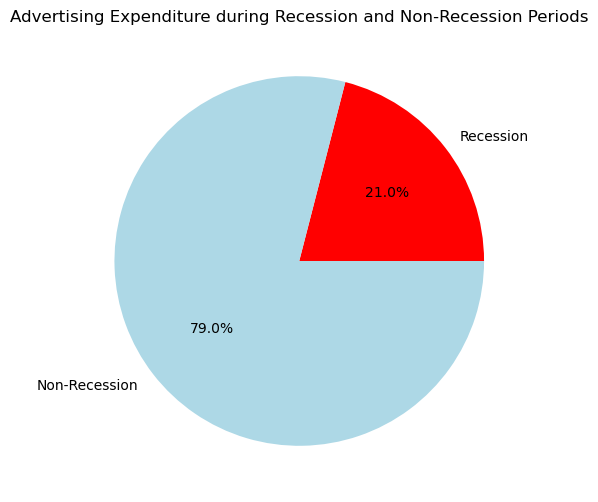

In [47]:


rec_df = df[df['Recession'] == 1]
non_rec_df = df[df['Recession'] == 0]

rec_df_sum = rec_df['Advertising_Expenditure'].sum()
non_rec_df_sum = non_rec_df['Advertising_Expenditure'].sum()
plt.figure(figsize=(6,6))
plt.pie(labels = ['Recession', 'Non-Recession'], x = [rec_df_sum, non_rec_df_sum],colors=['red', 'lightblue'], autopct='%1.1f%%')
plt.title("Advertising Expenditure during Recession and Non-Recession Periods")
plt.show()

<details>
<summary>Click here for Solution template</summary>

```python
    # Filter the data 
    Rdata = df[df['Recession'] == 1]
    NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
    RAtotal = Rdata['...........'].sum()
    NRAtotal = NRdata['...........'].sum()

    # Create a pie chart for the advertising expenditure 
    plt.figure(figsize=(8, 6))

    labels = ['Recession', 'Non-Recession']
    sizes = [RAtotal, NRtotal]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('...........................')

    plt.show()


```
</details>


#### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?<br> Type your answer below:-


Advertisemnt expendtiure during Non Recession is almost 4 times that during recession

<details><summary>Inference</summary>
It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!<br><br></details>


<span style="color:red">
Save this plot as "Pie_1.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


<details><summary>Click here for a hint</summary>

<p>
     You will be required to group vehicle type for sum of advertisement expenditure.
    <br> the plot a pie with the data, May include relevant labels
    <br>title this plot as  - Share of Each Vehicle Type in Total Expenditure during Recessions</p>
</details>


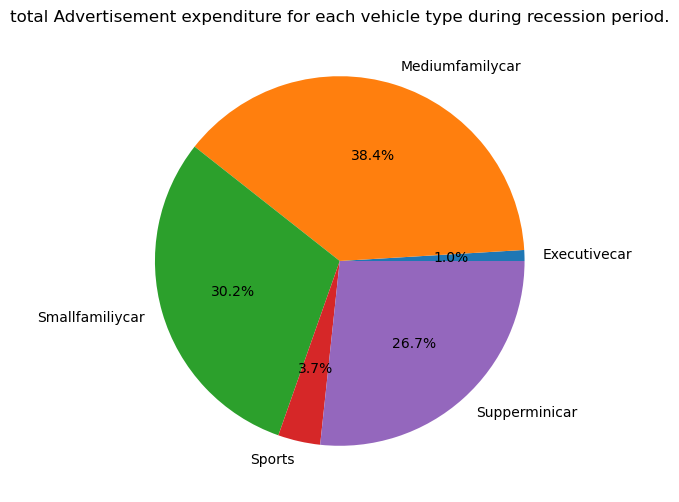

In [49]:
rec_df = df[df['Recession'] == 1]

df_veh_exp = rec_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(6,6))
plt.pie(labels = df_veh_exp.index, x = df_veh_exp.values , autopct='%1.1f%%')
plt.title("total Advertisement expenditure for each vehicle type during recession period.")
plt.show()

<details>
    <summary>Click here for Solution template</summary>

```python
    # Filter the data 
    Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
    VTexpenditure = Rdata.groupby('..........')['.............'].sum()

    # Create a pie chart for the share of each vehicle type in total expenditure during recessions
    plt.figure(figsize=(..., ...))

    labels = VTexpenditure.index
    sizes = VTexpenditure.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('....................')

    plt.show()
```
    </details>


### Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!<br><br>
<span style="color:red">
Save this plot as "Pie_2.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


----


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


<details><summary>Click here for a hint</summary>

<p>
    Filter out the data for recession period<br>
     Make use of lineplot() from seaborn and pass the relavent data</p>
</details>


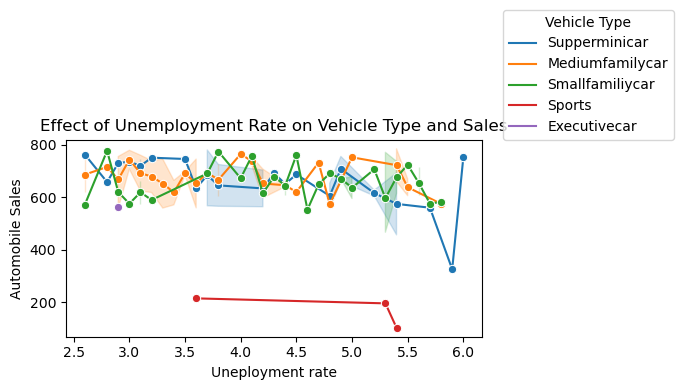

In [52]:
rec_df = df[df['Recession'] == 1]
plt.figure(figsize = (7, 4))
sns.lineplot(data = rec_df, x= 'unemployment_rate', y = 'Automobile_Sales', hue = 'Vehicle_Type',marker = 'o')
plt.xlabel('Uneployment rate')
plt.ylabel('Automobile Sales')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc=(0.05,.3))

plt.tight_layout()
plt.show()

In [ ]:
df.columns

#### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?<br> Type your answer below:-


#### For superminicar sales decreased with increase in unemployment rate and surprising they saw a hug rise when the unemployment rate was peak,

#### for small family car there is no steady pattern it fluctuated alot
#### It's the same for mediummini car as well 

<details><summary>Inference</summary>
During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar<br><br>
</details>


<span style="color:red">
Save this plot as "line_plot_3.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth


In [ ]:
rec_df = df[df['Recession'] == 1]
by_city = rec_df.groupby('City')['Automobile_Sales'].sum().reset_index()

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)

choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )
map1

<details><summary>Click for Solution</summary>
    
```python

    # Filter the data for the recession period and specific cities
    recession_data = data[data['Recession'] == 1]

    # Calculate the total sales by city
    sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
    map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
    choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
    map1

```
</details>


# Congratulations! You have completed the lab


## Authors


[Dr. Pooja](author_link)


``` toggle ## Change Log
```


<!---|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
2024-01-05|0.2.1|Sowmyaa Gurusamy|Updated the lab instructions|
|2023-06-17|0.2|Pooja|Initial Lab Creation|
|2023-05-01|0.1|Shengkai|Create Lab Template|-->


Copyright © 2023 IBM Corporation. All rights reserved.
